In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')


In [ ]:
# Paths to the JSONL files
file_paths = [
    '/content/all1.jsonl',
    '/content/all2.jsonl',
    '/content/all3.jsonl',
    '/content/all4.jsonl']

# Function to load data from JSONL files
def load_data(file_paths):
    data = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line.strip()))
                except json.JSONDecodeError as e:
                    print(f"Error in file {file_path}, line: {line}")
                    print(f"Error message: {e}")
    return data

# Load the data
data = load_data(file_paths)
print("Data loaded successfully")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Data loaded successfully


In [ ]:
import json
import nltk
import string
import pandas as pd
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are available
nltk.download('punkt')

# Paths to the JSONL files
file_paths = [
    '/content/all1.jsonl',
    '/content/all2.jsonl',
    '/content/all3.jsonl',
    '/content/all4.jsonl'
]

# Function to load data from JSONL files with error handling
def load_data(file_paths):
    data = []
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if line.strip():  # Ensure the line is not empty
                        try:
                            data.append(json.loads(line.strip()))
                        except json.JSONDecodeError as e:
                            print(f"Error decoding JSON in file {file_path}: {e}")
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    return data

# Load the data
data1 = load_data([file_paths[0]])
data2 = load_data([file_paths[1]])
data3 = load_data([file_paths[2]])
data4 = load_data([file_paths[3]])

# Combine data for training and validation
train_data = data1 + data2 + data3
test_data = data4

# Function to convert data to DataFrame format
def data_to_dataframe(data):
    sentence_ids = []
    words = []
    labels = []

    for i, item in enumerate(data):
        sentence = item['text']
        entities = item.get('label', [])

        # Tokenize sentence into words
        word_list = word_tokenize(sentence)
        word_list = [word for word in word_list if word not in string.punctuation]  # Remove punctuation
        label_list = ['O'] * len(word_list)  # Default label is 'O'

        for entity in entities:
            start, end, entity_type = entity
            entity_text = sentence[start:end]
            entity_words = word_tokenize(entity_text)
            entity_words = [word for word in entity_words if word not in string.punctuation]  # Remove punctuation

            current_pos = 0
            for j, word in enumerate(word_list):
                word_start = current_pos
                word_end = current_pos + len(word)

                if word_start >= start and word_end <= end:
                    label_list[j] = entity_type  # Assign the entity type directly

                current_pos += len(word) + 1

        for word, label in zip(word_list, label_list):
            sentence_ids.append(i)
            words.append(word)
            labels.append(label)

    return pd.DataFrame({
        'sentence_id': sentence_ids,
        'word': words,
        'label': labels
})

# Convert training and validation data to DataFrames
train_df = data_to_dataframe(train_data)
#test_df = data_to_dataframe(test_data)

# Display the first few rows of the training DataFrame
print("Training DataFrame:")
print(train_df.head())


In [ ]:
train_df

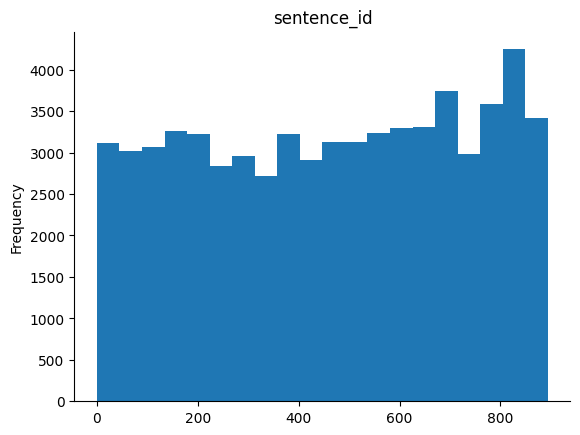

In [ ]:
from matplotlib import pyplot as plt
train_df['sentence_id'].plot(kind='hist', bins=20, title='sentence_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

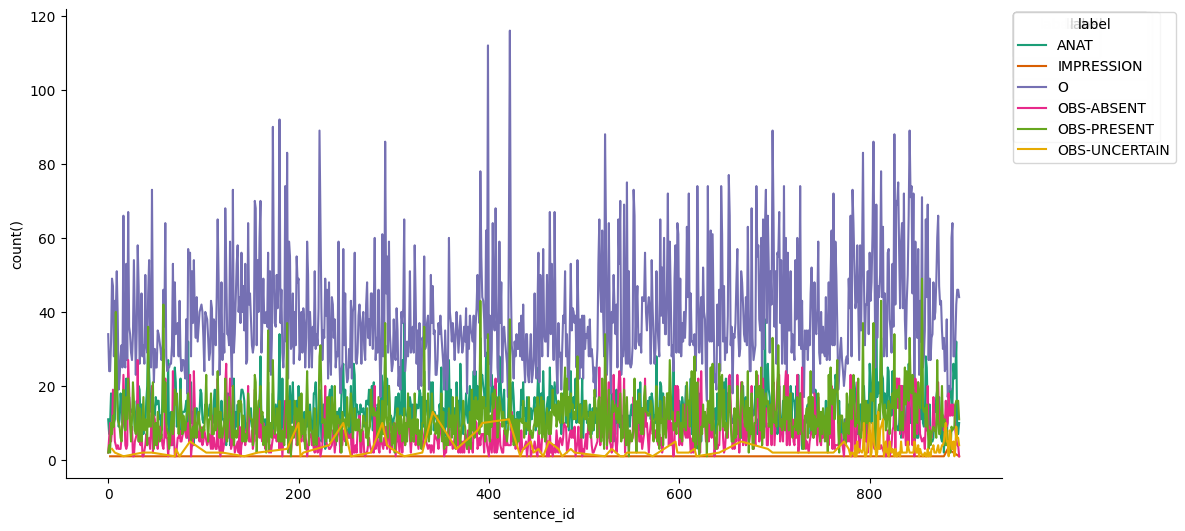

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sentence_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sentence_id'}, axis=1)
              .sort_values('sentence_id', ascending=True))
  xs = counted['sentence_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_df.sort_values('sentence_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('label')):
  _plot_series(series, series_name, i)
  fig.legend(title='label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sentence_id')
_ = plt.ylabel('count()')

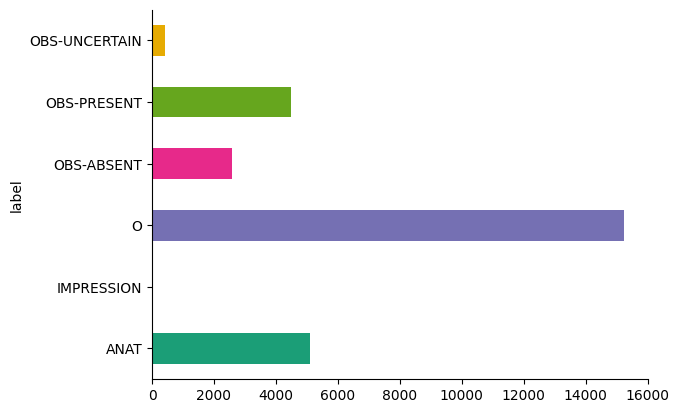

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

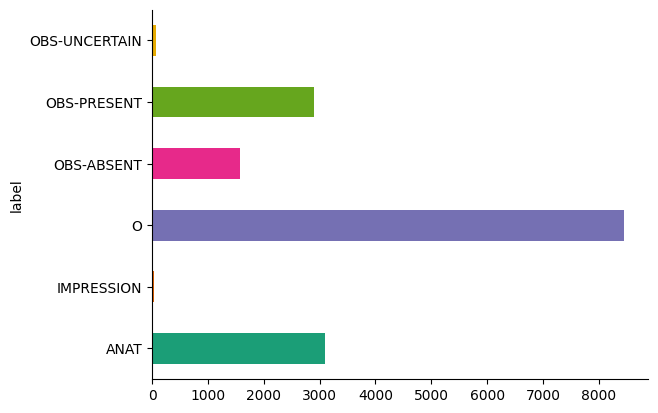

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
test_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def change_impression_to_O(row):
    if row['label'] == 'IMPRESSION':
        return 'O'
    else:
        return row['label']



In [ ]:
# Apply the function to the DataFrame
train_df['label'] = train_df.apply(change_impression_to_O, axis=1)
#test_df['label'] = test_df.apply(change_impression_to_O, axis=1)


In [ ]:
train_df["label"].value_counts()

label
O                15288
ANAT              5086
OBS-PRESENT       4493
OBS-ABSENT        2580
OBS-UNCERTAIN      426
Name: count, dtype: int64

In [ ]:
test_df["label"].value_counts()

label
O                8486
ANAT             3102
OBS-PRESENT      2908
OBS-ABSENT       1575
OBS-UNCERTAIN      74
Name: count, dtype: int64

In [ ]:
# Save the dataframes to CSV files (if needed)
train_df.to_csv('/content/train_dataset.csv', index=False)

In [ ]:
test_df.to_csv('/content/test_dataset.csv', index=False)

In [ ]:
train_df.head()

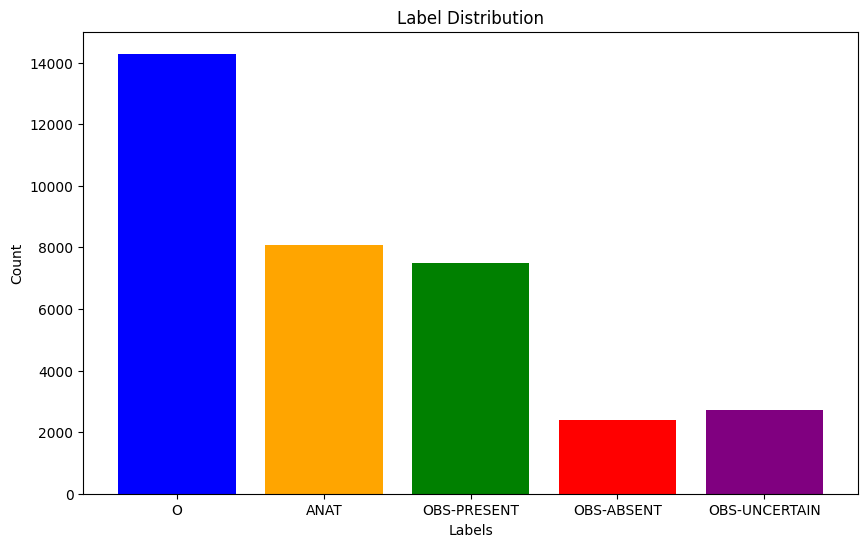

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['O', 'ANAT', 'OBS-PRESENT', 'OBS-ABSENT', 'OBS-UNCERTAIN']
values = [14288, 8086, 7493, 2380, 2726]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()